In [2]:
%reload_ext autoreload
%autoreload 2
from scrape_GR_tools import *
from scrape_explore import *
#put this in scrape_GR_tools
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# setting up mongodb

client = MongoClient('mongodb://localhost:27017/')

db = client['goodreads_explore_multigraph']

friends = db['friends']
ratings = db['reviews']
books = db['books']

In [67]:
def reset_colls(friends, ratings, books):
    friends.delete_many({})
    ratings.delete_many({})
    books.delete_many({})

In [78]:
reset_colls(friends, ratings, books)

In [73]:
# checking what we've got
# 178 users as of 7:56 PM 11/9/16

t = books.find()
countList = []

for b in t:
    countList.append(len(b['ratings']))

clS = pd.Series(countList)

In [74]:
print '%d users' % ratings.count()
print '%d books' % books.count()
print '%d users have scraped friend lists\n' % friends.count()

print '%.2f%% of books have >1 ratings' % float(100*(clS>1).mean())
print '(%d books)\n' %(clS>1).sum()

print '%.2f%% of books have >2 ratings' % float(100*(clS>2).mean())
print '(%d books)\n' %(clS>2).sum()

print '%.2f%% of books have >5 ratings' % float(100*(clS>5).mean())
print '(%d books)\n' %(clS>5).sum()

print '%.2f%% of books have >10 ratings' % float(100*(clS>10).mean())
print '(%d books)\n' %(clS>10).sum()

print 'Descriptive statistics for ratings:'
clS.describe()

35 users
8070 books
57 users have scraped friend lists

6.82% of books have >1 ratings
(550 books)

1.00% of books have >2 ratings
(81 books)

0.09% of books have >5 ratings
(7 books)

0.00% of books have >10 ratings
(0 books)

Descriptive statistics for ratings:


count    8070.000000
mean        1.085874
std         0.375790
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
dtype: float64

In [76]:
for f in friends.find():
    #print f

IndentationError: expected an indented block (<ipython-input-76-6ac956c9cfbb>, line 2)

In [77]:
populate_friends(ratings, friends, books, 0.05)

Retrieved 15 friends in 2.027474 seconds.
User 26379700 has 0 friends explored, or 0.000000% of their friends.
Retrieved 85 friends in 4.161085 seconds.
User 15060501 has 0 friends explored, or 0.000000% of their friends.


KeyboardInterrupt: 

In [22]:
quantiles = []
for p in np.linspace(0.8,0.99,50):
    quantiles.append(clS.quantile(p))

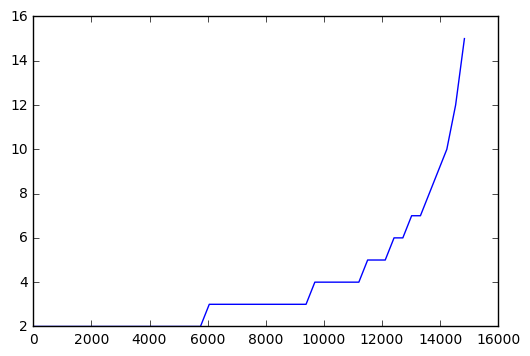

In [23]:
plt.plot(books.count()*(np.linspace(0.9,0.99,50)-0.9), quantiles);

In [107]:
# profiling example
bookID = 15775022

pr = cProfile.Profile()
pr.run('userFromBook(bookID)')
pr.print_stats(sort='module')

In [75]:
#testing how to use Session class -- for sending ajax requests
#if we ever need to

session = requests.Session()

session.cookies = requests.cookies.cookiejar_from_dict(cookies())

bookID = 15775022

urlBook = 'https://www.goodreads.com/book/show/' + str(bookID)

session.get(urlBook).content

'<!DOCTYPE html>\n<html class="desktop">\n\n\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# good_reads: http://ogp.me/ns/fb/good_reads#">\n  <title>\nGoodreads | The Crisis of the European Mind by Paul Hazard \xe2\x80\x94 Reviews, Discussion, Bookclubs, Lists\n</title>\n\n    <script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();\n </script>\n    <script type="text/javascript">\n      (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(m,l,h,j,i){var k={m:m,f:l,l:h,c:""+j,err:i,fromOnError:1,args:arguments};c.ueLogError(k);return false}b.skipTrace=1;e.onerror=b;function f(){c.uex("ld")}if(e.addEventListener){e.addEventListener("load",f,false)}else{if(e.attachEvent){e.attachEvent("onload",f)}}a.tag=d("tag");a.log=d("log");a.reset=d("rst");c.ue_csm=c;c.ue=a;c.ueLogError=d("err");c.ues=d(

(0, 21.6)

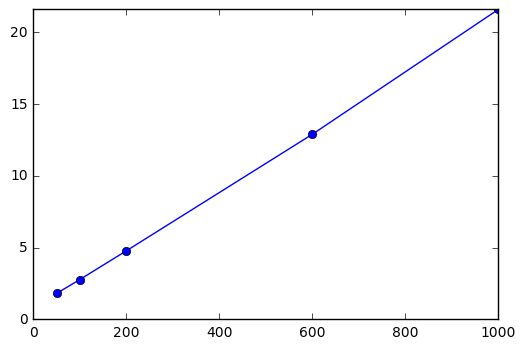

In [85]:
# checking friend page timings
x = [50, 100, 200, 600, 1000]
y = [1.81, 2.78, 4.78, 12.9, 21.6]
plt.plot(x,y, 'o-')
plt.xlim(0,max(x))
plt.ylim(0, max(y))

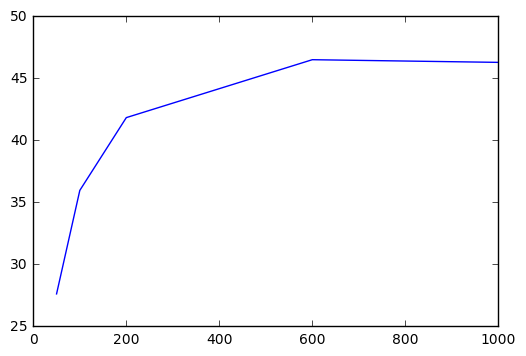

In [86]:
plt.plot(x, [xx/yy for xx,yy in zip(x,y)])

(0, 7.02)

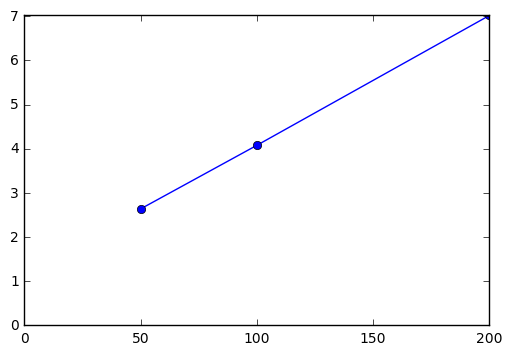

In [87]:
# now reviews
x = [50, 100, 200]
y = [2.64, 4.08, 7.02]
plt.plot(x,y, 'o-')
plt.xlim(0,max(x))
plt.ylim(0, max(y))